<a href="https://colab.research.google.com/github/hngphanminh147/cv/blob/master/harris_corner_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

from google.colab.patches import cv2_imshow

(800, 800)


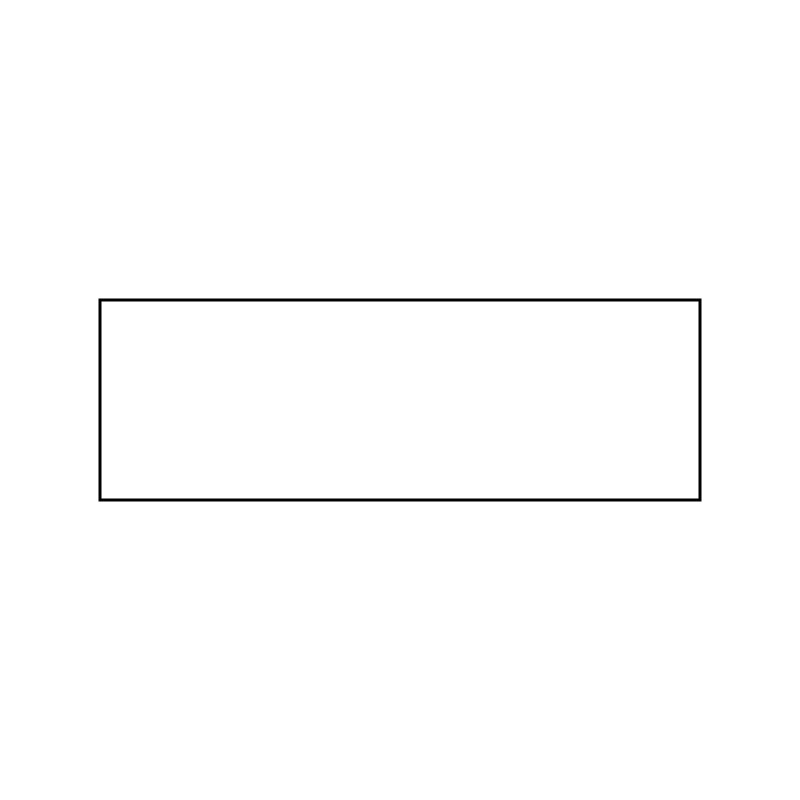

In [31]:
path = "/content/drive/MyDrive/Colab Notebooks/img/large.jpg"
# path = "/content/drive/MyDrive/Colab Notebooks/img/images.png"
scale = 1
img = cv2.imread(path)
img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
# img = cv2.imread(path, flags=cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=((int)(img.shape[1] * scale),(int)(img.shape[0] * scale)))

print(img.shape)
cv2_imshow(img)

In [32]:
class Harris:
    def gray(self, img):
        gray = img
        if (len(gray.shape) == 3):
            gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
        return gray

    def blur(self, img):
        blur = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=1)
        return blur

    def determinant(self, mat):
        return None

    def trace(self, mat):
        return None

    def gaussian_kernel(self, ksize:int=5, sigma:int=1):
        r = ksize // 2
        x, y = np.mgrid[-r:r + 1, -r:r + 1]

        a = 1.0 / (2.0 * np.pi * sigma**2)
        b = np.exp(-(x**2 + y**2)/(2 * sigma**2))

        return a*b

    def sobel(self):
        sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
        sobel_y = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

        # derivates of img
        der_x = cv2.filter2D(src=self.img, ddepth=-1, kernel=sobel_x)
        der_y = cv2.filter2D(src=self.img, ddepth=-1, kernel=sobel_y)        
        der_mat = np.array([[der_x**2, der_x * der_y], [der_x * der_y, der_y**2]], dtype=np.float32)

        return der_mat

    def harris_value(self):
        w, h = self.img.shape
        der_mat = self.sobel()
        img = self.blur()

        for i in range(1, w - 1):
            for j in range(1, h - 1):
                try:
                    w = img[i - 1:i + 1, j - 1:j + 1] * der_mat
                except ValueError as e:
                    pass

    def thresholding(self):
        return None

    def nonmaxima_supression(self):
        return None

    def detect(self, img, k=0.05, threshold_ratio=0.05, sup_val=10):
        img = self.gray(img)
        img = self.blur(img)
        w, h = img.shape

        sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
        sobel_y = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

        # derivates of img
        # ix = cv2.filter2D(src=img, ddepth=0, kernel=sobel_x)
        # iy = cv2.filter2D(src=img, ddepth=0, kernel=sobel_y)
        ix = ndimage.convolve(input=img, weights=sobel_x)
        iy = ndimage.convolve(input=img, weights=sobel_y)
        # products of derivatives
        ixx = ix * ix
        iyy = iy * iy
        ixy = ix * iy
        # sums of the products of derivatives
        window = np.ones(shape=(3, 3))
        sxx = ndimage.convolve(input=ixx, weights=window)
        syy = ndimage.convolve(input=iyy, weights=window)
        sxy = ndimage.convolve(input=ixy, weights=window)

        # # define m matrix and calculate the response of the detector
        # response = np.zeros(shape=(w, h))
        response = []
        max = 0
        for i in range(1, w - 1):
            for j in range(1, h - 1):
                if (img[i, j] != 0):
                    try:
                        m = np.array(object=[[sxx[i, j], sxy[i, j]], [sxy[i, j], syy[i, j]]], dtype=np.int32)
                        # RuntimeWarning: overflow encountered in ubyte_scalars
                        det = m[0, 0] * m[1, 1] - m[0, 1] * m[1, 0]
                        trace = m[0, 0] + m[1, 1]
                        r = det - k * (trace**2)

                        # response[i, j] = r
                        response.append((i, j, r))

                        if r > max:
                            max = r

                    except ValueError as e:
                        pass
        # thresholding
        threshold = max * threshold_ratio
        l = []
        for res in response:
            x, y, r = res
            if r > threshold:
                l.append([x, y, r])
        # nonmaxima suppression
        s = sorted(l, key=lambda l: l[2], reverse=True)
        re = []
        re.append(s[0])

        for i in s:
            append = True
            for j in re:
                if (abs(i[0] - j[0]) <= sup_val) and (abs(i[1] - j[1]) <= sup_val):
                    append = False
                    break
            if (append) and (i not in re):
                re.append(i)

        re = np.array(re)
        return re[:,0], re[:,1]


In [33]:
h = Harris()
x, y = h.detect(img, sup_val=20)

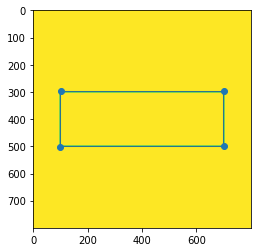

In [34]:
plt.imshow(img)
plt.scatter(y, x)